In [1]:
import itertools

import numpy as np
from qutip import *
# some_file.py
from mpl_toolkits.mplot3d import Axes3D

from qudit import *
# import scipy
import time
import IPython.display as disp
from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt
from discrete_simulation import *

%load_ext autoreload
%autoreload 2

In [10]:
d = 16
m_i = 16
m_c = 16
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,8)
gamma_ratio = 1


simulation16 = DiscreteSimulation(d, m_i,m_c )

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list1616 = [tup[0] for tup in fid_prob_list]
prob_list1616 = [tup[1] for tup in fid_prob_list]

print(1)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_168 = [tup[0] for tup in fid_prob_list]
prob_list_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_164 = [tup[0] for tup in fid_prob_list]
prob_list_164 = [tup[1] for tup in fid_prob_list]

print(3)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_168_NC = [tup[0] for tup in fid_prob_list]
prob_list_168_NC = [tup[1] for tup in fid_prob_list]

print(3)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_164_NC = [tup[0] for tup in fid_prob_list]
prob_list_164_NC = [tup[1] for tup in fid_prob_list]

2


In [11]:
m_i = 16
m_c = 2
simulation2 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_162_NC = [tup[0] for tup in fid_prob_list]
prob_list_162_NC = [tup[1] for tup in fid_prob_list]

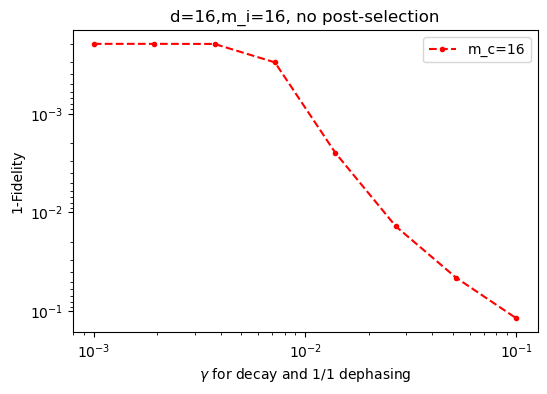

In [12]:
plt.figure(dpi=100)

legend = ["m_c=16","m_c=8","m_c=4", "m_c=8 no comm", "m_c=4 no comm", "m_c=2 no comm"]

# plt.loglog(gamma_list,1-np.array(fid_list1616), 'b.-')
# plt.loglog(gamma_list,1-np.array(fid_list_168), 'c.-')
plt.loglog(gamma_list,1-np.array(fid_list_164), 'r.--')
# plt.loglog(gamma_list,1-np.array(fid_list_168_NC), 'k.-')
# plt.loglog(gamma_list,1-np.array(fid_list_164_NC), 'g.--')
# plt.loglog(gamma_list,1-np.array(fid_list_162_NC), 'k.--')
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\gamma$ for decay and 1/{gamma_ratio} dephasing")
plt.ylabel("1-Fidelity")
# plt.ylim([1,1e-5])
plt.legend(legend)
plt.title(f"{d=},{m_i=}, no post-selection")
plt.gca().invert_yaxis()

Text(0, 0.5, '1-error probability')

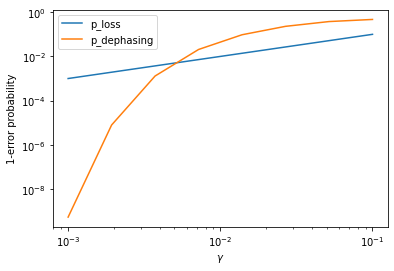

In [94]:
plt.loglog(gamma_list, [simulation4.enQudit.quditA.p_loss(gamma, 1) for gamma in gamma_list])
plt.loglog(gamma_list, [simulation4.enQudit.quditA.p_dephasing(gamma, 1) for gamma in gamma_list])

plt.legend(["p_loss","p_dephasing"])
plt.xlabel(f"$\gamma$")
plt.ylabel(f"1-error probability")

In [62]:
gamma_loss = 1e-2
gamma_dephasing = 1e-2

p_dephasing_notgood = simulation4.enQudit.p(gamma_loss,gamma_dephasing,0,1,0,0)/simulation4.probability_sum(gamma_loss,gamma_dephasing)/4 * 4
# multiply by m_i/m_f = 8 to get the real probabilities
p_loss_notgood = simulation4.enQudit.p(gamma_loss,gamma_dephasing,0,0,1,0)/simulation4.probability_sum(gamma_loss,gamma_dephasing)/2 * 2
# multiply by m_i/m_f = 8 to get the real probabilities

print(f"{p_dephasing_notgood=}")
print(f"{p_loss_notgood=}")
print(f"total estimatied fidelity: {1- (p_loss_notgood + p_dephasing_notgood)}")

simulation4.average_fidelity(gamma_loss,gamma_dephasing)


p_dephasing_notgood=0.023098186112775473
p_loss_notgood=0.008853955808297353
total estimatied fidelity: 0.9680478580789271


(0.9991880126581195, 0.0)

In [59]:
simulation4.probability_sum(1e-3,1e-3)

4.008008005336003

In [52]:
simulation4.enQudit.p(1e-3,1e-3,0,0,0,0)/simulation4.probability_sum(1e-3,1e-3)
# multiply by m_i/m_f = 8 to get the real probabilities

0.9980019976038036

In [68]:
gamma_loss = 1e-3
gamma_dephasing = 1e-3
A_1,B_1,A_2,B_2 = 0,0,1,7
m_i = 16
m_c = 16

f = simulation4.enQudit.fidelity_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, A_1=A_1,
                                                 B_1=B_1, A_2=A_2,
                                                 B_2=B_2, m_i=m_i, m_c=m_c)
p = simulation4.enQudit.probability_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, A_1=A_1,
                                                 B_1=B_1, A_2=A_2,
                                                 B_2=B_2, m_i=m_i, m_c=m_c)
print(f"{f=}")
print(f"{p=}")

f=6.349206342440267e-27
p=4.0


In [74]:
1-simulation4.average_fidelity(gamma_loss = gamma_loss, gamma_dephasing=gamma_dephasing)[0]

1.9973346673252124e-06

In [ ]:
m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)



In [30]:
gamma_loss = 1e-2
gamma_dephasing = 1e-2
A_1, B_1 = 0,3
A_2, B_2 = 0,0
m_i = 16
m_c = 4

print(simulation4.enQudit.fidelity_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, 
                                      A_1=A_1, B_1=B_1, A_2=A_2, B_2=B_2, m_i=m_i, m_c=m_c))
print(simulation4.enQudit.fidelity_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, 
                                      A_1=A_1, B_1=B_1, A_2=A_2, B_2=B_2, m_i=m_i, m_c=m_c,no_com=True))

0.9998000379678909
2.02535443505119e-09


In [22]:
a = zip(list(gamma_list),list(gamma_list), [fidelity_cut] * len(gamma_list))

In [26]:
a.__next__()

(0.03162277660168379, 0.03162277660168379, 0.999)

In [5]:
d = 32
qudit4 = EntangledQudit(d,d)
m_i = 16
m_c = 4
A_1, B_1 = 0, 4
A_2, B_2 = 1, 1
qudit4.fidelity_specific(gamma_loss_A=1e-2,gamma_dephasing_A=1e-2, A_1=A_1,B_1=B_1,A_2=A_2,B_2=B_2,m_i=m_i,m_c=m_c)

0.8011951446533203
0.30577850341796875


0.4999000166639561

In [5]:
1-fid_list[0][0]

6.656897255652439e-13

In [7]:
fid_list2

[0.9999999999993343, 0, 0, 0]

In [ ]:


# Create some sample data
x = np.logspace(0, 2, 100)
y = np.logspace(0, 2, 100)
x, y = np.meshgrid(x, y)
z = x ** 2 + y ** 2

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using log scale for all three axes
ax.plot_surface(np.log10(x), np.log10(y), np.log10(z))

# Set log scale for all axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_zscale('log')

# Set axis labels
ax.set_xlabel('Log X')
ax.set_ylabel('Log Y')
ax.set_zlabel('Log Z')

# Show the plot
plt.show()

In [29]:
d = 16
m_i = 16
m_c = 8
fidelity_cut = 1

simulation16 = DiscreteSimulation(d, m_i,m_c )

simulation16.average_fidelity(gamma_loss=1e-2,gamma_dephasing=1e-2, fidelity_cut=0.5)

(0.9986425150010688, 0.09425920207965674)

In [19]:
d = 32
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,8)
gamma_ratio = 1

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_168 = [tup[0] for tup in fid_prob_list]
prob_array_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_164 = [tup[0] for tup in fid_prob_list]
prob_array_164 = [tup[1] for tup in fid_prob_list]


2


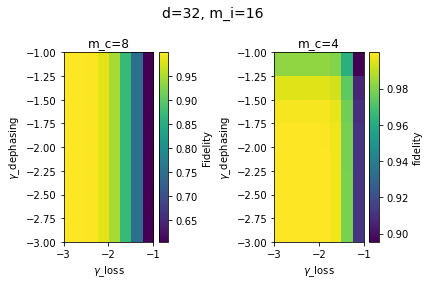

In [31]:
# Reshape data arrays into 2D grid with the correct shape
N = int(np.sqrt(len(fid_array_164)))  # assuming it's a perfect square
fid_array_168_2d = np.array(fid_array_168).reshape(N, N)
fid_array_164_2d = np.array(fid_array_164).reshape(N, N)

# create a grid of gamma values
gamma1, gamma2 = np.meshgrid(gamma_list, gamma_ratio * gamma_list)

# Create a new figure
plt.figure()
plt.suptitle(f"{d=}, {m_i=}", fontsize=14)

# Display fidelity data
plt.subplot(1, 2, 1)
plt.title('m_c=8')
# plt.gca().set_xscale('log')
# plt.gca().set_yscale('log')
plt.imshow(fid_array_168_2d, extent=[-3, -1, -3, -1], origin='lower', aspect='auto')
plt.colorbar(label='Fidelity')
plt.xlabel('$\gamma$_loss')
plt.ylabel('$\gamma$_dephasing')


# Display probability data
plt.subplot(1, 2, 2)
plt.title('m_c=4')
plt.imshow(fid_array_164_2d, extent=[-3, -1, -3, -1], origin='lower', aspect='auto')
plt.colorbar(label='fidelity')
plt.xlabel('$\gamma$_loss')
plt.ylabel('$\gamma$_dephasing')

plt.tight_layout()
plt.show()

In [100]:
list(itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))

[(0.001, 0.001, 0),
 (0.001, 0.0019306977288832496, 0),
 (0.001, 0.003727593720314938, 0),
 (0.001, 0.0071968567300115215, 0),
 (0.001, 0.013894954943731374, 0),
 (0.001, 0.026826957952797246, 0),
 (0.001, 0.0517947467923121, 0),
 (0.001, 0.1, 0),
 (0.0019306977288832496, 0.001, 0),
 (0.0019306977288832496, 0.0019306977288832496, 0),
 (0.0019306977288832496, 0.003727593720314938, 0),
 (0.0019306977288832496, 0.0071968567300115215, 0),
 (0.0019306977288832496, 0.013894954943731374, 0),
 (0.0019306977288832496, 0.026826957952797246, 0),
 (0.0019306977288832496, 0.0517947467923121, 0),
 (0.0019306977288832496, 0.1, 0),
 (0.003727593720314938, 0.001, 0),
 (0.003727593720314938, 0.0019306977288832496, 0),
 (0.003727593720314938, 0.003727593720314938, 0),
 (0.003727593720314938, 0.0071968567300115215, 0),
 (0.003727593720314938, 0.013894954943731374, 0),
 (0.003727593720314938, 0.026826957952797246, 0),
 (0.003727593720314938, 0.0517947467923121, 0),
 (0.003727593720314938, 0.1, 0),
 (0.0071